<a href="https://colab.research.google.com/github/jhonda18/Python2/blob/main/N3_C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> <b>Técnicas computacionales en Python para Ciencias Económicas - Universidad de Antioquia </b> </h1>
<hr size=10 noshade color="green">
<p>
<img alt="CC BY-NC-SA logo" height="70px" src="https://lahormigonera.info/wp-content/uploads/2014/04/by-nc-sa-ccLicense.png" align="left" hspace="0px" vspace="0px">
</p>

<div align="right">  
Este documento está bajo licencia <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es">[CC BY-NC-SA]</a><br> 
<a href="mailto:sheryl.avendano@udea.edu.co"> ✉ Sheryl Avendaño </a> ,  <a href="mailto:sergio.sanes@udea.edu.co"> ✉ Sergio Sanes </a>, <a href="mailto: mario.sucerquia@udea.edu.co"> ✉ Mario Sucerquia </a><br>
Versión actualizada: 3-Ago-2020
</div>

<br>

**El presente curso hace parte de la Facultad de Ciencias Económicas (FCE) de la Universidad de Antioquia.**

El curso será dictado en 11 sesiones o clases de 3 horas los días martes y jueves por medio de Google meeting. Para un total de dedicación temporal de 32 horas. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import seaborn as sns

#**Ajuste de polinomios**



### Polinomios 1D

Numpy me permite el manejo de polinomios usando los métodos asociados a  `poly`. Por ejemplo, imaginemos que tenemos el polinomio:

$$9x^2 + 6x + 8$$

Podemos generar un objeto tipo polinomio usando Numpy y la función `poly1d`


In [ ]:
p = np.poly1d([9,6,8]) #este es nuestro polinomio
#Podemos evaluar directamente cuando x = 5
p(5)

263

In [ ]:
#Hallar sus raíces
p.roots

array([-0.33333333+0.8819171j, -0.33333333-0.8819171j])

In [ ]:
def dir_nice(v):
  print("Clase:",type(p))
  methods = [m for m in dir(v) if not m.startswith('_') and callable(getattr(v, m))]
  attr = [m for m in dir(v) if not m.startswith('_') and not callable(getattr(v, m))]
  print("Atributos:",attr)
  print("Métodos:",methods,end="\n\n")

In [ ]:
#Miremos los atributos y métodos que tiene un polinomio de una dimensión
dir_nice(p)

Clase: <class 'numpy.poly1d'>
Atributos: ['c', 'coef', 'coefficients', 'coeffs', 'o', 'order', 'r', 'roots', 'variable']
Métodos: ['deriv', 'integ']



In [ ]:
#Derivada primer orden del polinomio 9x^2 + 6x +6 --> 18x + 6
p_derivada_1 = p.deriv(m=1)
p_derivada_1 

poly1d([18,  6])

In [ ]:
#Integral primer orden (indefinida) del polinomio 9x^2 + 6x + 8 --> 3x^3 + 3x^2 + 8x + c
p_integral_1 = p.integ(m=1, k=0)
p_integral_1

poly1d([3., 3., 8., 0.])

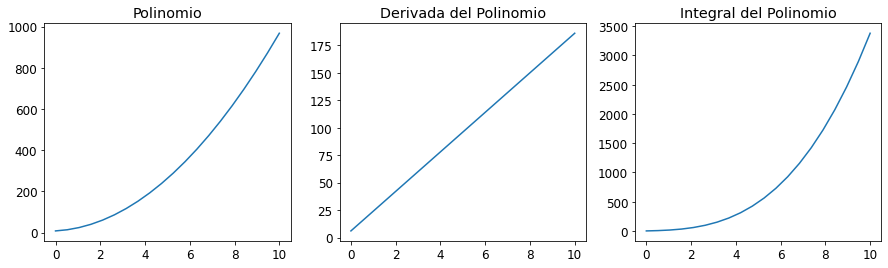

In [ ]:
#Grafiquemos nuestro porlinomio y su derividad e integral para x=[0,10]
x = np.linspace(0,10,20)
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.title("Polinomio")
plt.plot(x,p(x))

plt.subplot(1,3,2)
plt.title("Derivada del Polinomio")
plt.plot(x,p_derivada_1(x))

plt.subplot(1,3,3)
plt.title("Integral del Polinomio")
plt.plot(x,p_integral_1(x))
plt.show()

### Ajustemos un polinomio 1D

In [ ]:
#Creamos un par x/y 
x = np.linspace(0,1,20)
y = np.sin(x) + 0.3*np.random.rand(20)
# Aquí vemos que  y = f(x)

#Ahora vamos a asumir una relación y = c_3 * x^3 + c_2 * x^2 + c_1 * x + c_0 y averiguar esos coeficientes
C = np.polyfit(x,y,3)
#Luego vamos a crear un polinomio 1D con esos coeficientes
p_fit = np.poly1d(C)

### Revisión del ajuste visual

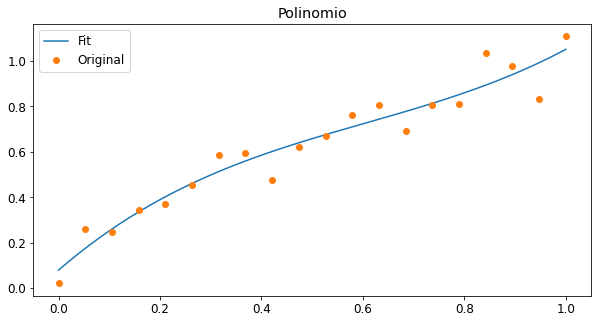

In [ ]:
#Creamos un  nuevo x y y (revisión) con más valores
x_rev = np.linspace(0,1,200)
y_rev = p_fit(x_rev)

#Y graficamos x_rev vs y_rev junto a nuestros x vs y originales
plt.figure(figsize=(10,5))
plt.title("Polinomio")
plt.plot(x_rev,y_rev,label="Fit")
plt.plot(x,y,'o',label="Original")
plt.legend()
plt.show()

### Error en el ajuste

Para ello revisar la función [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html#numpy.polyfit)

```
Returns
pndarray, shape (deg + 1,) or (deg + 1, K)
Polynomial coefficients, highest power first. If y was 2-D, the coefficients for k-th data set are in p[:,k].

residuals, rank, singular_values, rcond
Present only if full = True. Residuals is sum of squared residuals of the least-squares fit, the effective rank of the scaled Vandermonde coefficient matrix, its singular values, and the specified value of rcond. For more details, see linalg.lstsq.

Vndarray, shape (M,M) or (M,M,K)
Present only if full = False and cov`=True. The covariance matrix of the polynomial coefficient estimates. The diagonal of this matrix are the variance estimates for each coefficient. If y is a 2-D array, then the covariance matrix for the `k-th data set are in V[:,:,k]
```



In [ ]:
#Podemos hallar muchas más cosas con polifit
coef, res, rank, s_values, rcond = np.polyfit(x,y,3,full=True)

#O directamente hallar la matriz de covariaza
coef, V =np.polyfit(x,y,3,cov=True)

Podemos usar `res` para verificar que nuestro polinomio si sea adecuado:

In [ ]:
x1 = np.linspace(0,1,50)
y1 = 2*x1**4 + 3*x1**2 + 9

p_fit = list()
r_fit = list()

grados = [1,2,3,4,5,6]
for g in grados:
  C, res, _, _,_ = np.polyfit(x1,y1,g,full=True)
  p_fit.append(np.poly1d(C))
  r_fit.append(res)

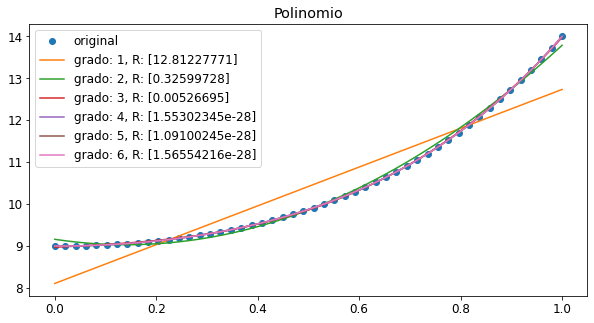

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Polinomio")
plt.plot(x1,y1,"o", label="original")

x_rev = np.linspace(0,1,100)
for i in range(len(p_fit)): 
  plt.plot(x_rev,p_fit[i](x_rev),label="grado: {}, R: {}".format(grados[i],r_fit[i])) 

plt.legend()
plt.show()

<hr size=15 noshade color="#F19CBB">

<h1> TALLER

<hr size=15 noshade color="#F19CBB">

# **Regresión lineal simple**

Para iniciar nuestro estudiode la regresión y ajuste usaremos uno de los casos más simples posibles: la regresión lineal. La ecuación de una línea recta está dada por la ecuación

$$y = m*x+b$$

Donde $y$ es la variable dependiente, $x$ la independiente y a $m$ y $b$ las llamamos pendientes e intercepto.

En un ambito más general solemos reescribir la ecuación como

$$y=w_0+w_1x$$

siendo $w_0$ y $w_1$ llamados los "parámetros del modelo"



Sklearn cuenta con una sublibrería completa para los modelos lineales llamada "linear_model".

Volvamos a nuestro dataset de autos.

In [ ]:
import pandas as pd
import numpy as np

archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

Usaremos el tamaño del motor para crear un modelo sencillo para el precio del auto.

In [ ]:
#separemos nuestros datos en features y label
X = df['engine-size'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

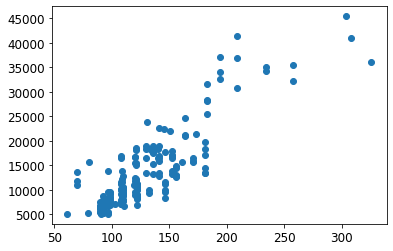

In [ ]:
plt.scatter(X,y)

<hr size=15 noshade color="#F19CBB">

<h1> TALLER

<hr size=15 noshade color="#F19CBB">


# **Regresión lineal multiple**


Normalmente los problemas a ajustar no son tan simples y los datos están compuestos de muchos predictores. En éstos casos podemos usar también el algorítmo de regresión lineal, haciendo una extensión de la ecuación de la linea a más dimensiones:
$$y=w_0+w_1x_1+w_2x_2+...+w_nx_n$$

Donde $n$ será la cantidad de variables predictoras en nuestros datos y de nuevo $w_i$ será el **peso** del predictor $x_i$.

En éstos casos ya no tendremos una línea si no un plano, o hiperplano como modelo.

In [ ]:
df.dropna(inplace=True)

In [ ]:
X = df.select_dtypes(exclude='object').drop('price',axis=1)
y = df['price']

LinearRegression usa el método de mínimos cuadrados, ésto hace que los parámetros estimados dependan fuertemente de la independencia de las características.

Cuando las columnas están fuertemente correlacionadas, llamado multicolinealidad,  el algorítmo de mínimos cuadrados es altamente sensible a variaciones aleatorias en la variable diana, haciendo que la varianza sea bastante grande.



<hr size=15 noshade color="#F19CBB">

<h1> TALLER

<hr size=15 noshade color="#F19CBB">

# **Otros estimadores lineales**

Dado el problema de multicolinealidad del algorírmo de mínimos cuadrados podemos mencionar dos opciones que vienen implementadas también en sklearn:

*   Regresión Ridge
*   Regresión Lasso




## Regresión Ridge
<p><a name="ridge"></a></p>

En éste típo de algorítmo se impondrá una penalidad sobre los coeficientes calculados, de tal manera que se modificará el error de los mínimos cuadrados como:

$$\sum (Y_i-\hat Y_i)^2+\alpha \sum w_i^2 $$


El hiperparámetro $\alpha$, llamado complejidad, controla qué tanto se penaliza los coeficientes, haciendo que éstos sean más pequeños y por tanto estabilizando las soluciones aunque a costa de una menor sesibilidad a los datos.



Para comparar entrenemos un modelo LinearRegresor y uno Ridge con todos los datos

In [ ]:
variables=['symboling', 'normalized-losses', 'wheel-base', 'length',
       'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'city-L/100km',  'diesel', 'gas']

In [ ]:
df.dropna(inplace=True)
X = df[variables]
y = df['price']

<hr size=15 noshade color="#F19CBB">

<h1> TALLER

<hr size=15 noshade color="#F19CBB">

*Veremos que en el caso del dataset para autos con un valor de $\alpha = 1$ se nota una pequeña variación en los parámetros y la precisión del modelo. El modelo se hace robusto a variaciones de los predictores, pero puerde un poco de precisión (se necesitan más datos para entrenamiento). En general el hiperparámetro $\alpha$ debe ser  buscado con varios experimentos.*

## Regresión Lasso

Al igual que el algorítmo Ridge, Lasso impone una penalidad sobre la función de error del OLS, pero ésta en cambio está dada por el valor absoluto de los coeficientes, así:
$$\sum (Y_i-\hat Y_i)^2+\alpha \sum |w_i|$$

Esto hace que a diferencia de Ridge que buscaba hacer pequeños los valores de algunos $w_i$, Lasso fuerza a que sean 0.

Así, puede decirse que Ridge es bueno cuando esperamos que todos los predictores tengan una influencia sobre el predictor así sea pequeña, mientras que Lasso se usará cuando esperamos que el numero de predictores relevantes sea pequeño (predictores con peso diferente de 0).

Para implementar una regresión tipo Lasso se sigue el mismo esquema de los casos anteriores.

<hr size=15 noshade color="#F19CBB">

<h1> TALLER

<hr size=15 noshade color="#F19CBB">

*Como vemos, Lasso ha disminuído el número de coeficientes mientras que Ridge no lo hace. La elección entre éstos 3 tipos de regresión lineal depende fuertemente de nuestro dataset (sus correlaciones), nuestro conocimiento del campo (relaciones esperadas de las variables predictoras y la variable diana) y nuestras necesidades computacionales.* 

## Redes eleasticas



Como vimos anteriormente, podemos generar penalizaciones a las regresiones lineales haciendo cambios en su metrica de error.

Para la regresión Ridge se penaliza con: $\alpha \sum w_i^2$ (penalidad $L_2$), mientras que para Lasso se tiene que: 
$\alpha \sum |w_i|$ (penalidad $L_1$). Cada una de ellas tenía sus pro y sus contra. Pero es posible hacer una combinación de ambos metodos.

A las regresiones que usan una combinación de ambas penalidades se les conoce como **ElasticNet** (Redes elásticas) y definimos su error como:
$$\sum (Y_i- \hat Y_i)^2+\alpha \rho \sum |w_i| + \frac{\alpha(1-\rho)}{2}\sum w_i^2. $$

Note que cuando $ \rho=1$ tenemos la regresión Lasso, y con $\rho=0$ tendremos la de Ridge, por tanto en las redes elásticas $0\leq \rho\leq1$.

<hr size=15 noshade color="#F19CBB">

<h1> TALLER

<hr size=15 noshade color="#F19CBB">